# OM

In [59]:
# from keras.layers import Dense
# import numpy

In [60]:
# # load pima indians dataset
# dataset = numpy.loadtxt("data/pima-indians-diabetes.data.txt", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]

In [61]:
# # create model
# model = Sequential()
# model.add(Dense(12, input_dim=8, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [62]:
# # Create your first MLP in Keras
# from keras.models import Sequential
# from keras.layers import Dense
# import numpy
# # fix random seed for reproducibility
# numpy.random.seed(7)
# # load pima indians dataset
# # dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
# # create model
# model = Sequential()
# model.add(Dense(12, input_dim=8, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# # Compile model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # Fit the model
# model.fit(X, Y, epochs=150, batch_size=10)
# # evaluate the model
# scores = model.evaluate(X, Y)
# print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

~~~~~~~~~~~~~~~

In [63]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, InputLayer
from keras.utils import np_utils

from keras.layers.normalization import BatchNormalization

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output

np.random.seed(2012)

In [64]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


In [65]:
print(X_train.shape)
print('min' , np.min(X_test), 'max : ', np.max(X_test))

(60000, 28, 28)
min 0 max :  255


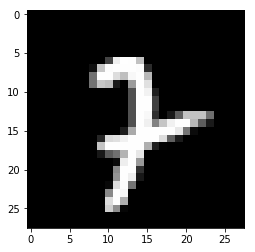

In [66]:
randon_idx = np.random.randint(1000)
plt.imshow(X_test[randon_idx, :, :], cmap='Greys_r' )
plt.show()

In [67]:
#reshape
trainX =  np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
testX =  np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# testX =  np.reshape(X_test, [X_test.shape[0]], (X_test.shape[1] * X_test.shape[2]))
print(testX.shape)
print(trainX.shape)


(10000, 784)
(60000, 784)


In [68]:
print(Y_train[0:10])
print(Y_test.shape)
print(X_train.shape)

[5 0 4 1 9 2 1 3 1 4]
(10000,)
(60000, 28, 28)


In [69]:
#Convert One Hot Encoding
Y_test = np_utils.to_categorical(Y_test,  10)
Y_train = np_utils.to_categorical(Y_train,  10)
print(Y_test.shape)
print(Y_train.shape)


(10000, 10)
(60000, 10)


In [70]:
class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

In [71]:
#Model
model = Sequential()
model.add(Dense(512, activation='relu', use_bias=True, input_shape=(784, )))
model.add(Dense(128, activation='relu', use_bias=True, ))
model.add(Dense(10, activation='softmax', use_bias=True))

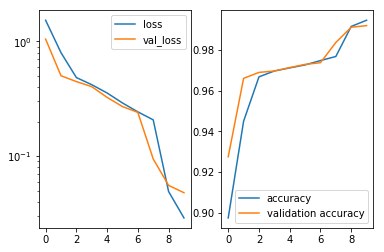

In [72]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
# history = model.fit(trainX, Y_train, epochs=150, batch_size=10)
# history = model.fit(trainX, Y_train, epochs=10, batch_size=1000)
# model.fit(trainX, Y_train,
#           epochs=10,
#           validation_data=(testX, Y_test),
#           callbacks=[plot],
#           verbose=0)
model.fit(trainX, Y_train,
          epochs=10,
          batch_size=1000,
          validation_data=(testX, Y_test),
          callbacks=[plot])
# evaluate the model
# scores = model.evaluate(testX, Y_test)
# print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [73]:
print(history.history.keys())
print(history.history)

dict_keys(['loss', 'acc'])
{'loss': [0.9047759552796681, 0.6832387785116831, 0.5506656795740128, 0.33779004390041034, 0.2299584299325943, 0.21114707589149476, 0.20026489992936453, 0.19507571707169216, 0.18925246670842172, 0.1857842266559601], 'acc': [0.9369073152542114, 0.9460205515225728, 0.9483155240615209, 0.9632337043682734, 0.9734235992034276, 0.9752969115972518, 0.9766985505819321, 0.9771952191988628, 0.9782251964012781, 0.9788935244083404]}


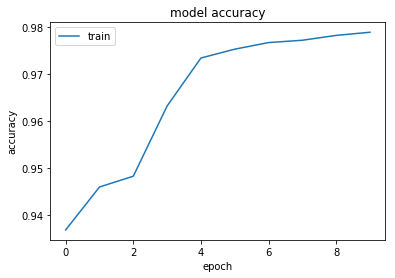

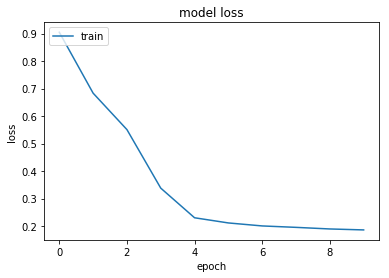

In [74]:
#  "Accuracy"
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [75]:
model.test_on_batch(testX, Y_test)
model.metrics_names

['loss', 'acc']

In [76]:
history.history

{'acc': [0.9369073152542114,
  0.9460205515225728,
  0.9483155240615209,
  0.9632337043682734,
  0.9734235992034276,
  0.9752969115972518,
  0.9766985505819321,
  0.9771952191988628,
  0.9782251964012781,
  0.9788935244083404],
 'loss': [0.9047759552796681,
  0.6832387785116831,
  0.5506656795740128,
  0.33779004390041034,
  0.2299584299325943,
  0.21114707589149476,
  0.20026489992936453,
  0.19507571707169216,
  0.18925246670842172,
  0.1857842266559601]}

In [77]:
# updatable plot
# a minimal example (sort of)

# class PlotLosses(keras.callbacks.Callback):
#     def on_train_begin(self, logs={}):
#         self.i = 0
#         self.x = []
#         self.losses = []
#         self.val_losses = []
        
#         self.fig = plt.figure()
        
#         self.logs = []

#     def on_epoch_end(self, epoch, logs={}):
        
#         self.logs.append(logs)
#         self.x.append(self.i)
#         self.losses.append(logs.get('loss'))
# #         self.val_losses.append(logs.get('val_loss'))
#         self.i += 1
        
#         clear_output(wait=True)
#         plt.plot(self.x, self.losses, label="loss")
# #         plt.plot(self.x, self.val_losses, label="val_loss")
#         plt.legend()
#         plt.show();
        
# plot_losses = PlotLosses()

In [78]:
#Model 2
model = Sequential()
model.add(Dense(512, activation='relu', use_bias=True, input_shape=(784, )))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', use_bias=True, ))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', use_bias=True))

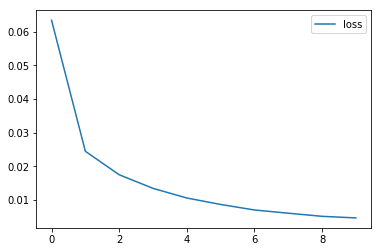

10000/10000 [==============================] - 2s 181us/step

acc: 99.63%


In [79]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
# history = model.fit(trainX, Y_train, epochs=150, batch_size=10)
history2 = model.fit(trainX, Y_train, epochs=10, batch_size=1000,
                    callbacks=[plot_losses])
# evaluate the model
scores = model.evaluate(testX, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

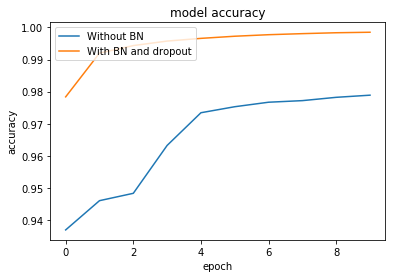

In [80]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history2.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Without BN', 'With BN and dropout'], loc='upper left')
plt.show()